# 1. Importar librerías y cargar datos

In [78]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar dataset y renombrar columnas a español
pib = pd.read_csv("pib_banco_mundial_50.csv", sep=";").rename(columns={
    "Country Name": "Pais",
    "Country Code": "Codigo",
    "2019": "PIB_2019",
    "2020": "PIB_2020",
    "2021": "PIB_2021",
    "2022": "PIB_2022",
    "2023": "PIB_2023"
})

# Lista de columnas (años) que vamos a usar como features/targets por año
anios = ["PIB_2019","PIB_2020","PIB_2021","PIB_2022","PIB_2023"]

# Muestro DF
pib


,Pais,Codigo,PIB_2019,PIB_2020,PIB_2021,PIB_2022,PIB_2023
0,Argentina,ARG,1.492100e+12,5.090000e+11,2.781000e+11,7.350000e+11,1.361300e+12
1,Brazil,BRA,8.961000e+11,2.279500e+12,1.978400e+12,1.322700e+12,1.234500e+12
2,United States,USA,2.164700e+12,6.277000e+11,6.323000e+11,1.705900e+12,1.531200e+12
3,China,CHN,8.600000e+09,1.491000e+11,1.204200e+12,2.200000e+12,9.592000e+11
4,India,IND,8.261000e+11,1.537000e+12,2.098200e+12,2.001300e+12,1.486400e+12
5,Germany,DEU,1.740500e+12,1.451500e+12,1.356700e+12,1.823800e+12,4.185000e+11
6,France,FRA,6.020000e+11,6.402000e+11,1.836300e+12,2.447700e+12,1.799200e+12
7,United Kingdom,GBR,2.299700e+12,1.399400e+12,7.928000e+11,1.191400e+12,2.180100e+12
8,Italy,ITA,7.559000e+11,2.445200e+12,7.028000e+11,1.006100e+12,1.090600e+12
9,Spain,ESP,3.763000e+11,4.963000e+11,5.665000e+11,6.679000e+11,7.281000e+11


# Variable dependiente

In [68]:
y = pib[pib["Pais"].str.lower()=="world"][anios].values.reshape(-1,1)

# Función para evaluar combinaciones (R²)

In [69]:
def r2_combo(paises):
    # Armamos X:
    # - set_index("Pais") para indexar por nombre de país
    # - loc[paises, anios] para seleccionar las filas de esos países y las columnas de años
    X = pib.set_index("Pais").loc[paises, anios].T.values

    # Entrenamos el modelo lineal con ese X y el y global ya definido antes
    modelo = LinearRegression().fit(X, y)

    # R² indica proporción de varianza explicada del PIB mundial por el combo
    return modelo.score(X, y)

# Ejemplos de combinaciones

In [80]:
print("Argentina:", r2_combo(["Argentina"]))
print("Argentina + Brasil:", r2_combo(["Argentina","Brazil"]))
print("EEUU + China + India:", r2_combo(["United States","China","India"]))
print("EEUU + China + India + Japan:", r2_combo(["United States","China","India","Japan"]))

Argentina: 0.0034724099935826702
Argentina + Brasil: 0.14242297379497848
EEUU + China + India: 0.7620320195804535
EEUU + China + India + Japan: 1.0


# Visualización 

In [81]:
# La función 'visualizar_combo' muestra:
#   (a) Serie temporal 2019–2023: real vs predicho
#   (b) Dispersión real vs predicho con línea ideal y=x

def visualizar_combo(paises):
    # Definir X (independientes) e y (dependiente)
    X = pib.set_index("Pais").loc[paises, anios].T.values
    y = pib[pib["Pais"].str.lower()=="world"][anios].values.reshape(-1,1)

    # Ajustar modelo y obtener predicciones + R²
    modelo = LinearRegression().fit(X, y)
    y_pred = modelo.predict(X)
    r2 = modelo.score(X, y)

    # ---- (a) Serie temporal: real vs predicho ----
    plt.figure(figsize=(10,4))
    plt.plot(anios, y, marker="o", label="PIB Mundial real")
    plt.plot(anios, y_pred, marker="s", label=f"Modelo {paises}")
    plt.title(f"Serie temporal: {paises} vs PIB Mundial (R²={r2:.3f})")
    plt.ylabel("PIB (USD)")
    plt.xlabel("Años")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ---- (b) Dispersión: real vs predicho ----
    # Si los puntos caen cerca de la línea roja y=x, el modelo predice bien.
    plt.figure(figsize=(5,5))
    plt.scatter(y, y_pred, color="blue")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Línea ideal (y = x)")
    plt.title(f"Real vs Predicho ({paises})")
    plt.xlabel("PIB Mundial real")
    plt.ylabel("PIB Mundial predicho")
    plt.legend()
    plt.show()

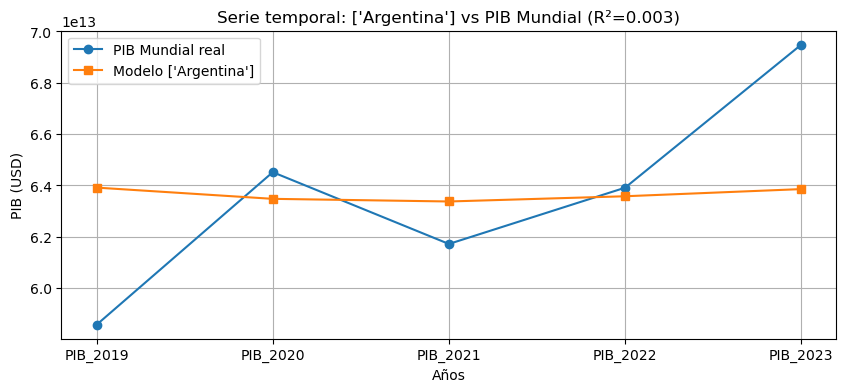

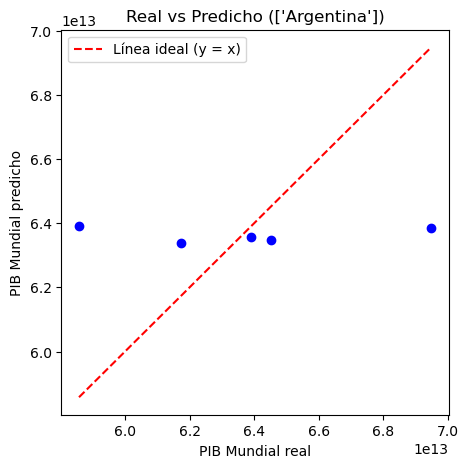

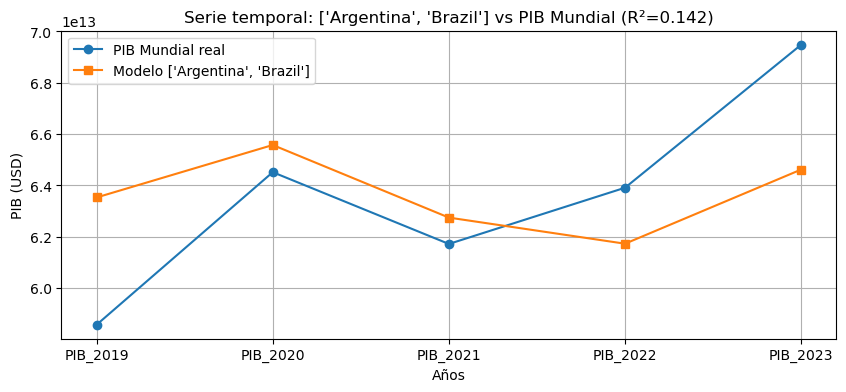

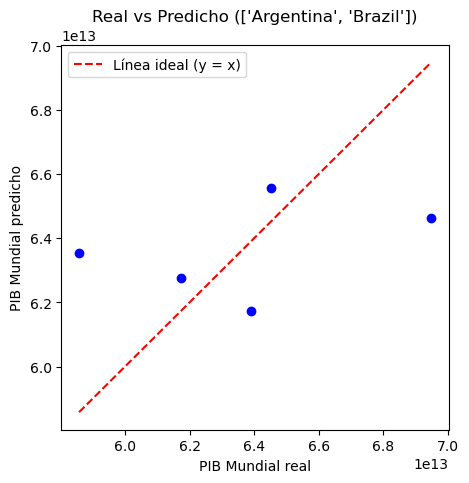

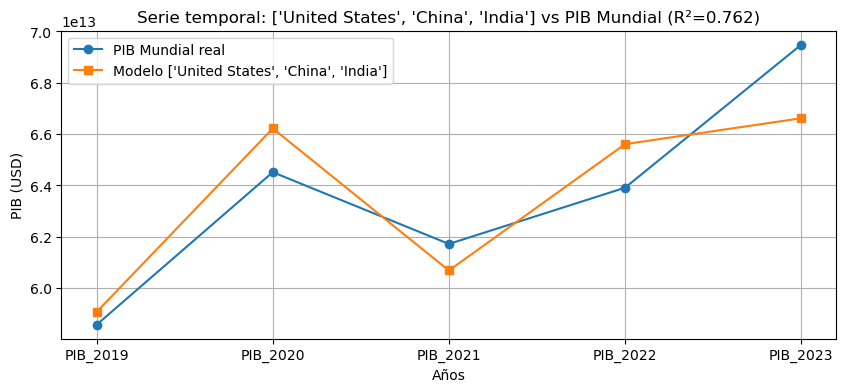

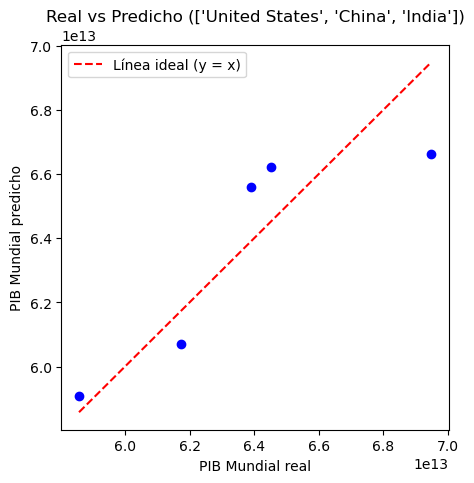

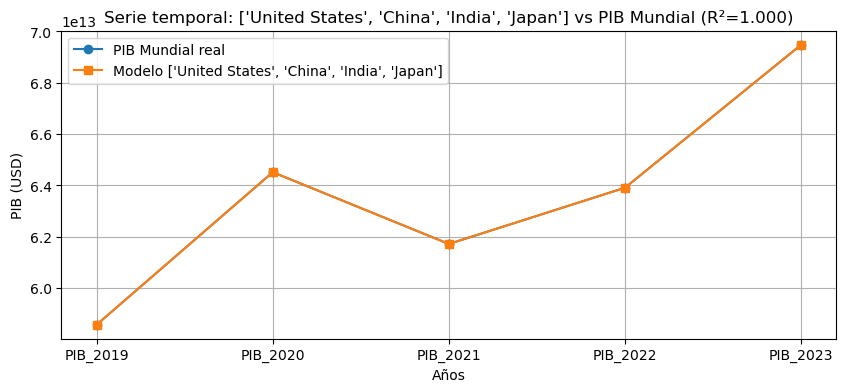

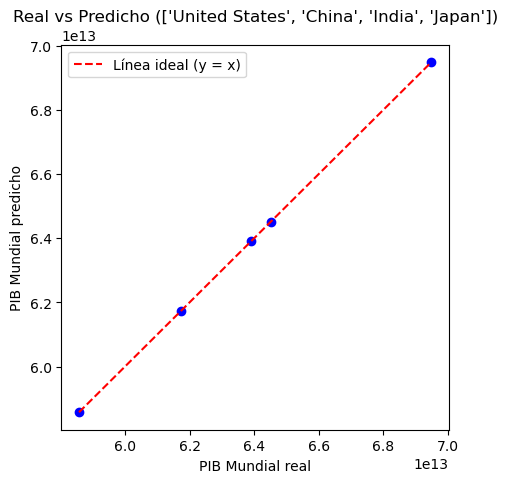

In [86]:
# Un país
visualizar_combo(["Argentina"])

# Dos países
visualizar_combo(["Argentina","Brazil"])

# Tres países
visualizar_combo(["United States","China","India"])

# Cuatro países
visualizar_combo(["United States","China","India","Japan"])


# Conclusión

En este ejercicio aplicamos regresión lineal para estudiar la relación entre el PIB de distintos países y el PIB mundial.
Los resultados mostraron que:
Con un país de **menor** peso económico (ej. Argentina sola) el poder explicativo fue bajo (R² bajo).

Al combinar **Argentina + Brasil, el modelo mejoró** pero todavía no logra explicar bien la variación global.

Con los **grandes actores económicos (Estados Unidos, China e India), el R² se acercó mucho a 1**, mostrando que estas economías concentran gran parte del PIB mundial y permiten predecirlo con alta precisión.

Al agregar otros países relevantes como **Japón**, el ajuste **mejoró aún más**, reflejando que incluir a las economías más grandes refuerza la linealidad.

En conclusión: sí existe una fuerte relación lineal entre el PIB de ciertas combinaciones de países y el PIB mundial, y son principalmente las mayores economías (EE.UU., China, India, Japón) las que explican casi toda la variación global.